In [3]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from Noah_Stracqualursi_Assignment4 import layerSizes, initialize_parameters, sigmoid, forward_prop, compute_cost, backward_propagation, update_parameters, model as models, predict
import sys



In [4]:
# predict winners for last 6 years from 2015
df = pd.read_csv('https://query.data.world/s/tsraemwghzslzokuqybdnphmt3g7u3')
dataset = df.values
dataset = np.delete(dataset,2,1)
dataset = np.delete(dataset,0,1)
le = preprocessing.LabelEncoder() 
le = le.fit(dataset[:,0])
dataset[:,0] = le.transform(dataset[:,0])
le = le.fit(dataset[:,5])
dataset[:,2] = le.transform(dataset[:,2])
dataset[:,5] = le.transform(dataset[:,5])
X = dataset[:,0:6]
y = dataset[:,2]
y = y.astype('int')
C = 1.0  # SVM regularization parameter
model = (svm.SVC(kernel='poly', degree=7, gamma='auto', C=C))
'''
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
degree_range = [5,6,7,8,9,10]

param_dist = {"gamma": gamma_range,
              "C": C_range,
              'degree': degree_range,
              'kernel': ['poly'],
              'class_weight':['balanced', None]}
n_iter_search = 10
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X, y)
print(random_search.best_score_)

print(random_search.best_estimator_.gamma)

print(random_search.best_estimator_.C)
'''
for i in range(6):
    model.fit(X[1648 + i*67:1648 + i*67 + 66,:],y[1648 + i*67:1648 + i*67 + 66])
    correct = 0
    prediction = model.predict(X[1648 + i*67 - 1,:].reshape(1, -1))
    print(prediction, y[1648 + i*67 + 66] )
    if prediction == y[1648 + i*67 + 66]:
        print("got it for year", 2011 + i)
    

[53] 53
got it for year 2011
[56] 116
[117] 128
[128] 53
[65] 65
got it for year 2015
[65] 271


71.73694779116467 percent of games played since 1985 have been in favor of the higher seed team.
2.829268292682927 percent of games played since 1985 have been same seeds.
25.433783916152407 percent of games since 1985 have been in favor of the lower seed team.


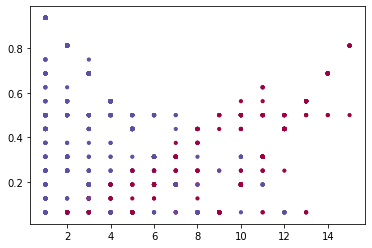

In [5]:
# seed statistics
dataset = df.values
le = preprocessing.LabelEncoder()
le = le.fit(dataset[:,7])
dataset[:,4] = le.transform(dataset[:,4])
dataset[:,7] = le.transform(dataset[:,7])
X = list()
y = list()
i = 0
X = np.zeros((2049,5))
y = np.zeros((2049,1), dtype='uint8')
favor = 0
count = 0
even = 0
for i in range(2050):
    if dataset[i][3] > dataset[i][6]:
        X[count] = [dataset[i][3], dataset[i][6], (dataset[i][3] - dataset[i][6]) / 16, dataset[i][4], dataset[i][7]]
        y[count] = 0
        count += 1
    elif dataset[i][3] < dataset[i][6]:
        X[count] = [dataset[i][3], dataset[i][6], (dataset[i][6] - dataset[i][3]) / 16, dataset[i][4], dataset[i][7]]
        y[count] = 1
        count += 1
        favor += 1
    else:
        even += 1
    
X = X[:-57].T
y = y[:-57].T

print(100 * (favor/count), "percent of games played since 1985 have been in favor of the higher seed team.")
print(100 * (even/(count+even)), "percent of games played since 1985 have been same seeds.")
print(100*(1 - ((favor/count) + (even/(count+even)))), "percent of games since 1985 have been in favor of the lower seed team.")
plt.scatter(X[0], X[2], c=y.ravel(), s=10, cmap=plt.cm.Spectral)

In [6]:
# logistic regression model
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X[2], y.ravel())
y_train = y_train.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
modelLR = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = cross_val_predict(modelLR, X_test, y_test, cv=5)
accuracy_score(y_test,y_pred)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.7269076305220884

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


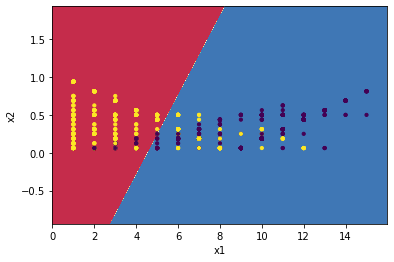

In [7]:
# log decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,2].min() - 1, X[:,2].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:,0], X[:,2], c=y.ravel(), s=10)
    

model = LogisticRegressionCV(cv=5)
model.fit(X[1:3].T,y.T)
plot_decision_boundary(model,X[0:3].T,y.T)

In [8]:
# neural network decision boundry plotter
def plot_decision_boundary2(model, X, y):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,2].min() - 1, X[:,2].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:,0], X[:,2], c=y.ravel())

In [9]:
# train model
parameters = models(X[1:3], y, 16, num_epochs=42000, print_cost=False)

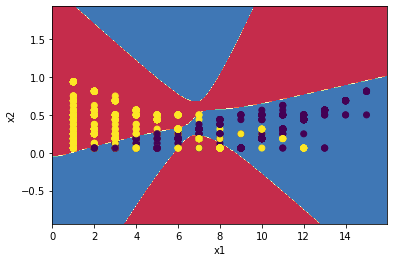

In [10]:
# plot the decision boundary
plot_decision_boundary2(lambda N: predict(parameters, N), X.T, y.ravel())

In [11]:
# accuracy of neural network
predictions = predict(parameters, X[1:3])
correct = 0
total = 0
for i in predictions[0]:
    total += 1
    if i:
        correct += 1
print ('Accuracy: %d' % float((correct/total)*100) + '%')

Accuracy: 77%


In [12]:
# MPL model 1
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

from sklearn.preprocessing import StandardScaler
new_X = np.delete(X.T,0,1)
scaled_X = StandardScaler().fit_transform(new_X[398:])
clf.fit(scaled_X, y.ravel()[398:])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
# generate predictions at an 20%/80% test/train rate
scaled_X_test = StandardScaler().fit_transform(new_X[:399])
predictions = clf.predict(scaled_X_test)

In [14]:
# See accuracy in predictions
correct = 0
total = 0
for prediction in predictions:
    if prediction == y.ravel()[total]:
        correct += 1
    total += 1
print ('Accuracy: %d' % float((correct/total)*100) + '%')

Accuracy: 90%


In [15]:
# testing prediction at low level
test = np.zeros((1,4))
test[0] = [1.600e+01, 9.375e-01, 1.300e+02, 1.070e+02]
clf.predict(StandardScaler().fit_transform(test))

array([1], dtype=uint8)

In [16]:
# MLP 2 using all data
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
new_X = np.delete(X.T,0,1)
scaled_X = StandardScaler().fit_transform(new_X)
clf2.fit(scaled_X, y.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
# getting 2019 data
f= open("mockSeasonRound64.csv","r")
test = []
count = 0
for line in f:
    if "St. Mary" in line:
        test.append(['Villanova', 0.3125, 11, "St. Mary's, California"])
    else:
        test.append(line.split(",")[1:5])
    count += 1

f.close()
test_pd = pd.DataFrame(test)
test_pd[0] = le.transform(test_pd[0])
test_pd[3] = le.transform(test_pd[3])

In [18]:
# predict round of 64 for 2019 using model from 1985-2015
results = clf2.predict(StandardScaler().fit_transform(test_pd))
count = 0
correct = 0
for result in results:
    if result == 0 and int(test[count][2]) > 8:
        correct += 1
    elif result == 1 and int(test[count][2]) <= 8:
        correct += 1
    count += 1

print(correct/count*100, "% correct picks in the round of 64.")

62.5 % correct picks in the round of 64.


In [19]:
# https://time.com/5566756/march-madness-brackets-random/
print(79/192*100, "% correct picks on average in 2019")

41.14583333333333 % correct picks on average in 2019


In [20]:
print((correct/count*100) - (79/192*100), "% better picking rate when using the model.")

21.35416666666667 % better picking rate when using the model.
